# Group 6: Productivity Prediction of Garment Employees

**Group Members:
Ryan Randazzo,
HaijiaoCui,
James Cho,
J Garcia,
James Ta,
Kevin Cordray,
Bryant Lam**

# Assignment Tasks


**1.** Perform exploratory data analysis and feature selection<br> 	
**2.** Plot the variable distribution using box plot, histogram, and provide a summary of your understanding<br>
**3.** Provide an insight on the outcome of correlation matrix <br>
**4.** Perform feature extraction using Principal Component Analysis (PCA) <br>
**5.** Develop a machine learning model to predict the “productivity performance” of the employees and compare the “performance metrics” of the algorithms. Summarize your key findings <br>
**6.** Please consider the problem statement as Classification <br>
**7.** Evaluate the performance metrics of logistic regression, SVM classifier, Naïve Bayes classifier, and Random Forest classifier <br>
**8.** Plot the relevant graphs, for example ROC, AUC, etc <br>
**9.** Recommend at least two approaches for increasing the productivity of the employees <br>


**Data Set Information:**
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

**Attribute Information:** <br>
**01.** date : Date in MM-DD-YYYY <br>
**02.** quarter : A portion of the month. A month was divided into four quarters <br>
**03.** department : Associated department with the instance <br>
**04.** day : Day of the Week <br>
**05.** team_no : Associated team number with the instance <br>
**06.** targeted_productivity : Targeted productivity set by the Authority for each team for each day.<br>
**07.** smv : Standard Minute Value, it is the allocated time for a task <br>
**08.** wip : Work in progress. Includes the number of unfinished items for products <br>
**09.** over_time : Represents the amount of overtime by each team in minutes <br>
**10.** incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
**11.** idle_time : The amount of time when the production was interrupted due to several reasons<br>
**12.** idle_men : The number of workers who were idle due to production interruption<br>
**13.** no_of_style_change : Number of changes in the style of a particular product<br>
**14.** no_of_workers : Number of workers in each team<br>
**15.** actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>


# Importing Libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder #Required for category encoding

# Importing Dataset

In [187]:
path = "garments_worker_productivity.csv"
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)

# Dataset Characteristics

## General Description

In [120]:
dataset.describe

<bound method NDFrame.describe of            date   quarter  department        day  team  targeted_productivity   
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80  \
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.

In [121]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [122]:
dataset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


## Datatypes 

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Analyze Categorical Values

### Date

In [124]:
dataset['date'].value_counts()


date
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: count, dtype: int64

Change date format

In [128]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [259]:
dataset['date'].dt.day.value_counts()

date
11    66
10    64
8     63
3     62
4     61
7     60
5     59
1     58
28    42
25    42
12    42
22    42
24    42
17    41
26    40
18    40
9     40
2     39
19    39
15    38
14    38
31    24
13    22
27    21
6     21
29    20
21    19
23    19
16    18
20    15
Name: count, dtype: int64

In [102]:
dataset['date'].dt.month.value_counts()

date
1    542
2    443
3    212
Name: count, dtype: int64

In [114]:
dataset['date'].dt.year.value_counts()

date
2015    1197
Name: count, dtype: int64

Remove year from date
All dates are from the same year and only three months of the year.

In [261]:
dataset['date'] = dataset['date'].dt.strftime('%m-%d')

In [262]:
dataset['date'].info

<bound method Series.info of 0       01-01
1       01-01
2       01-01
3       01-01
4       01-01
        ...  
1192    03-11
1193    03-11
1194    03-11
1195    03-11
1196    03-11
Name: date, Length: 1197, dtype: object>

### Quarter

In [263]:
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Both date and quarter are time dependent. Look for relationship between both.

<function matplotlib.pyplot.show(close=None, block=None)>

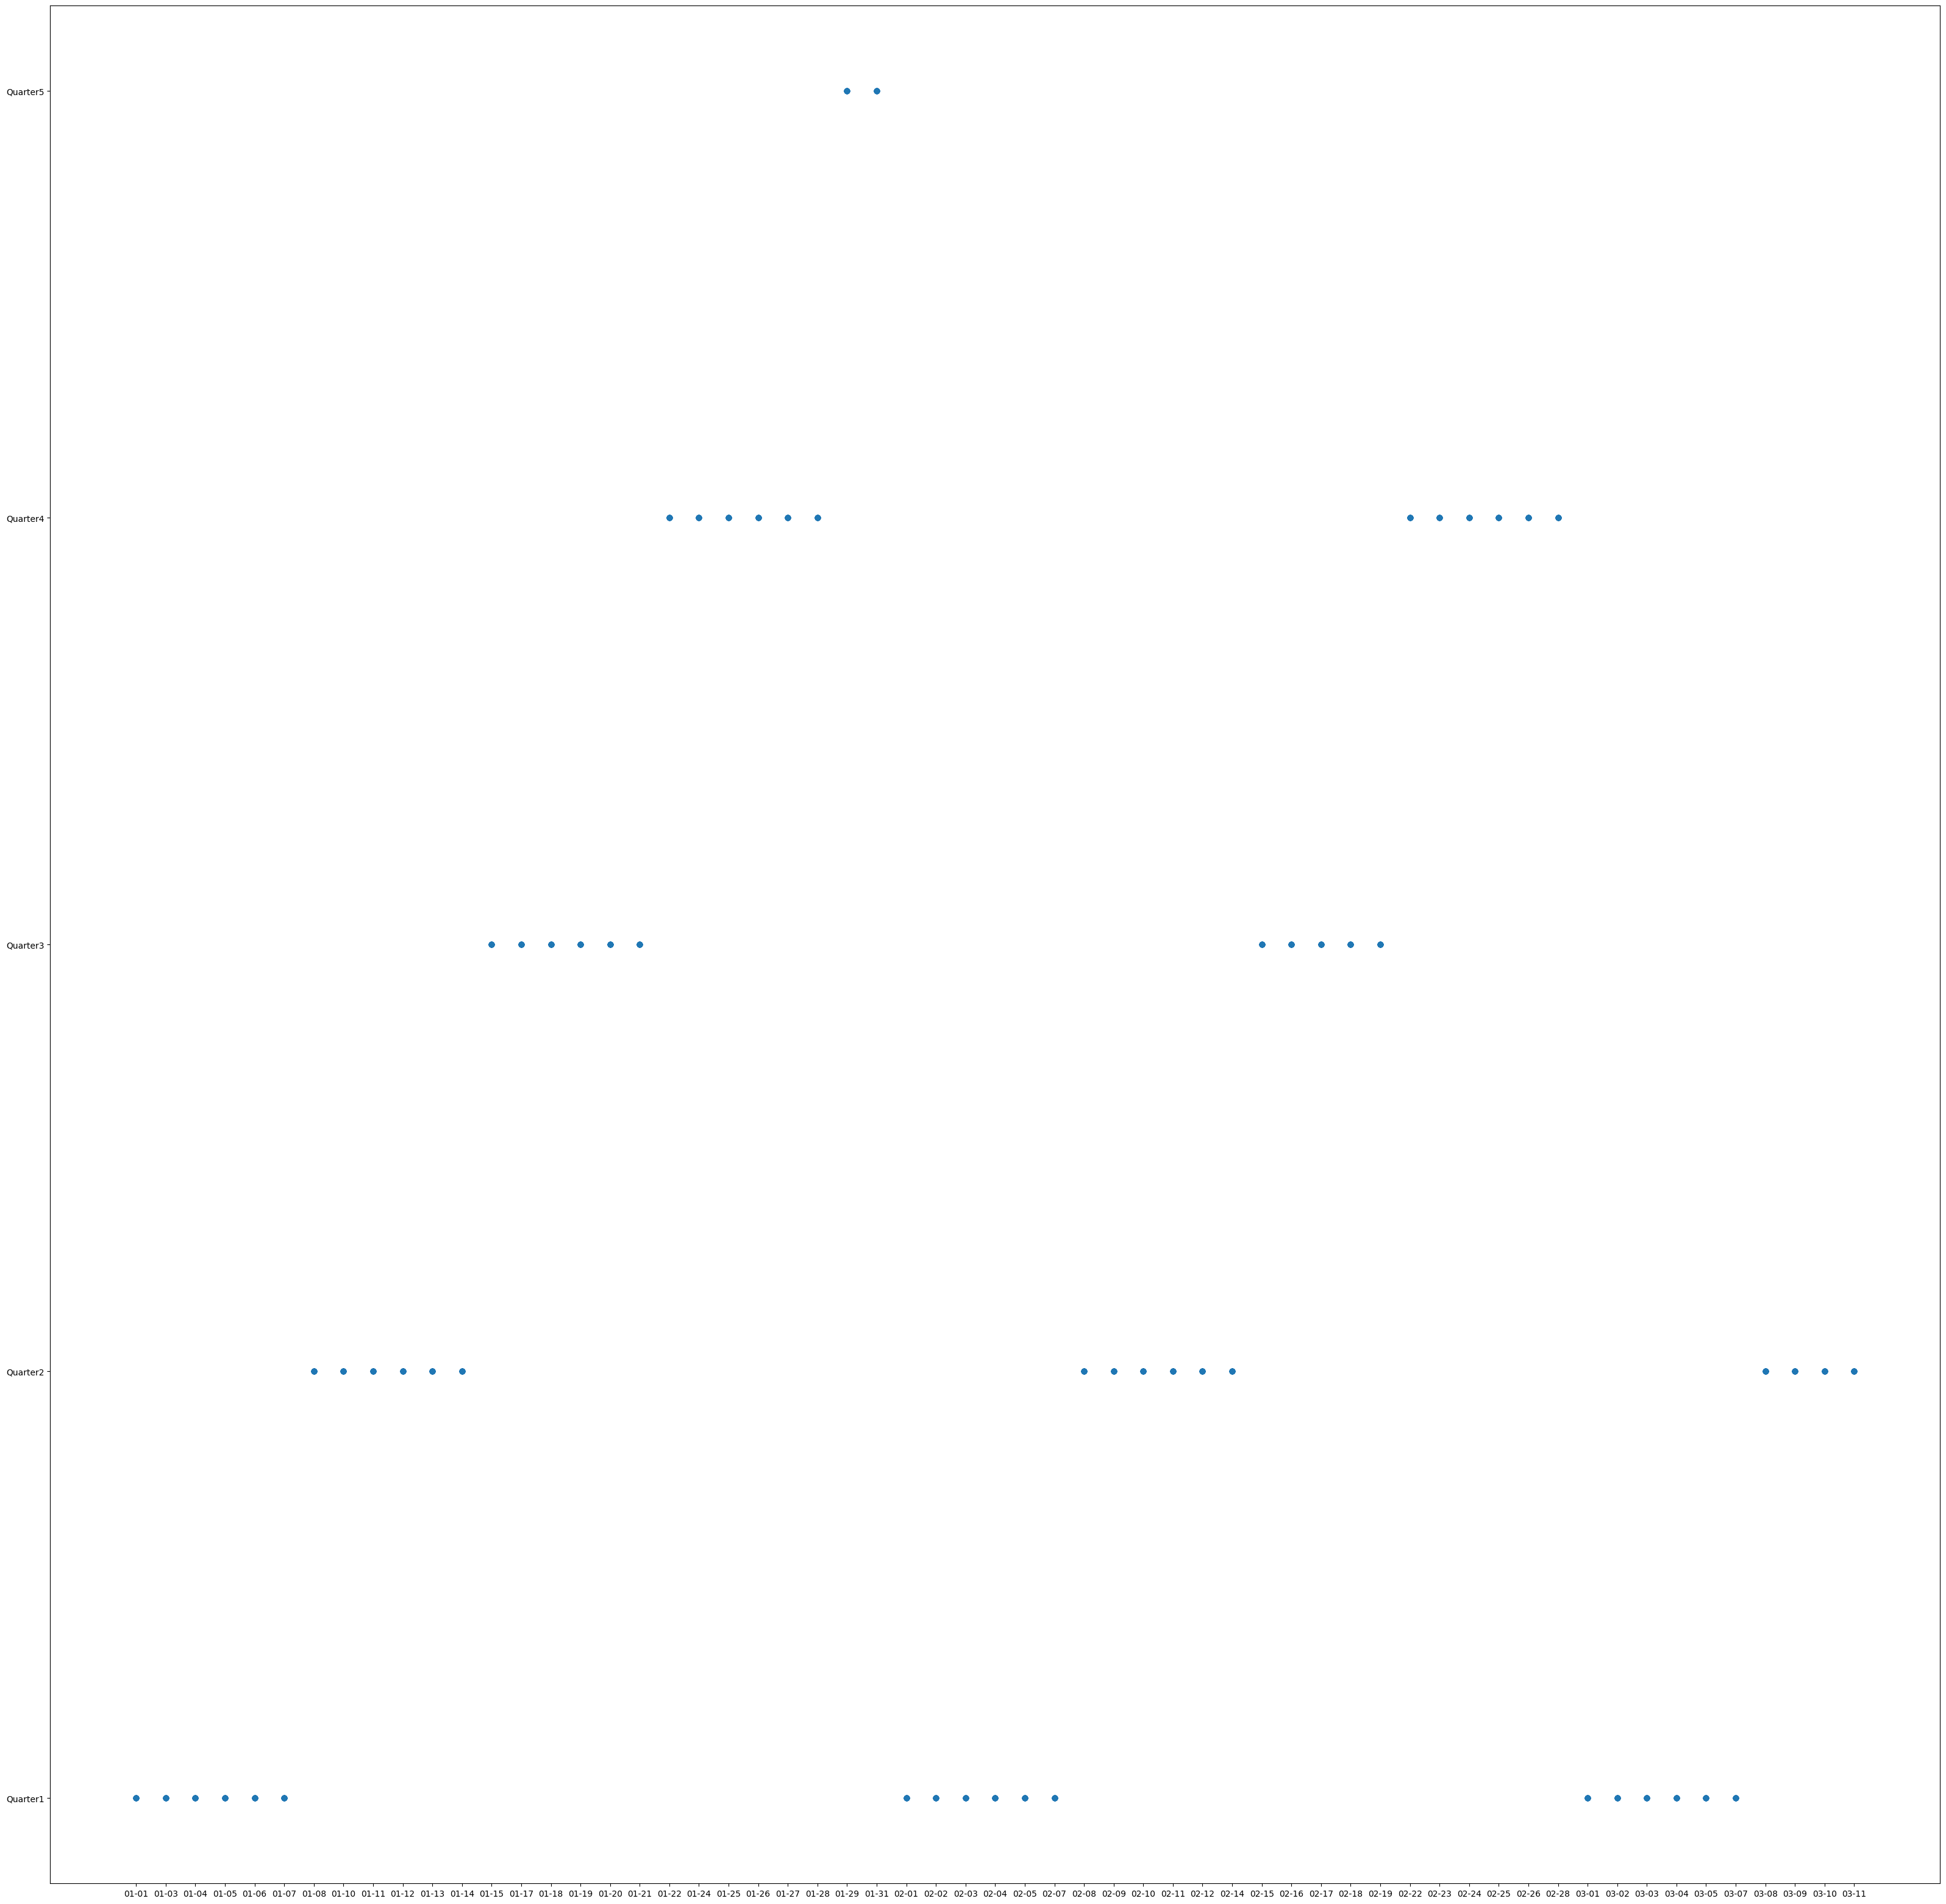

In [264]:
plt.figure(figsize=(40,40))
plt.scatter(dataset['date'], dataset['quarter'])
plt.show

Only days are significant as each quarter has the same unique days each month.
Extract days of each month.

In [265]:
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)
dataset['date'] = pd.to_datetime(dataset['date'])


In [266]:
dataset['date'] = dataset['date'].dt.strftime('%d')

In [267]:
dataset['date'].unique()

array(['01', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '24', '25', '26',
       '27', '28', '29', '31', '02', '09', '16', '23'], dtype=object)

Date can also be converted to a numerical value

In [268]:
dataset['date'] = dataset['date'].astype(str).astype(int)


<BarContainer object of 1197 artists>

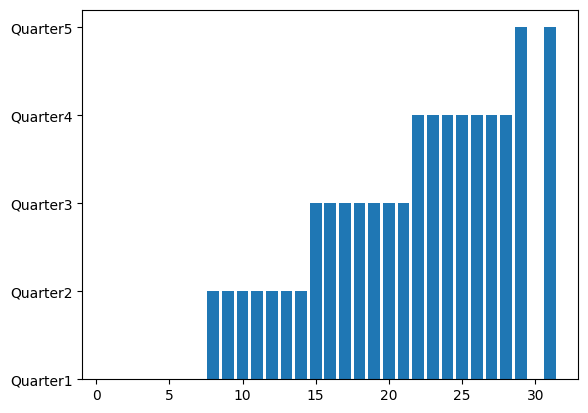

In [269]:
plt.bar(dataset['date'], dataset['quarter'])


### Department

In [270]:
dataset['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [271]:
dataset['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Department category 'sweing' is mispelled, must be changed to 'sewing' <br>
Category 'finishing' is has data with an added space that must be removed

In [272]:
dataset['department'].replace('sweing', 'sewing', inplace=True)
dataset['department'].replace('finishing ', 'finishing', inplace=True)
dataset['department'].unique()

array(['sewing', 'finishing'], dtype=object)

### Days

In [273]:
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

## Correct Name Spelling/Remove Spaces

In [226]:
dataset['department'].replace('sweing', 'sewing', inplace=True)
dataset['department'].replace('finishing ', 'finishing', inplace=True)
dataset['department'].value_counts()


department
sewing       691
finishing    506
Name: count, dtype: int64

## Look for Duplicates

In [274]:
dataset.duplicated().sum()

0

No duplicate records found

## Shape

In [275]:
dataset.shape

(1197, 15)

1197 rows, 15 columns

In [276]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Missing Values

Check for missing values

In [277]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

506 null values found in WIP feature. <br>
Replace null values with 0.

In [278]:
dataset['wip'].fillna(0, inplace=True)

Check info again

In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Team

In [233]:
dataset['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

There are 12 unique teams, this is a category an will be encoded.

## Numeric Features (Continuous and Discrete)

### Overview Boxplot

<Axes: >

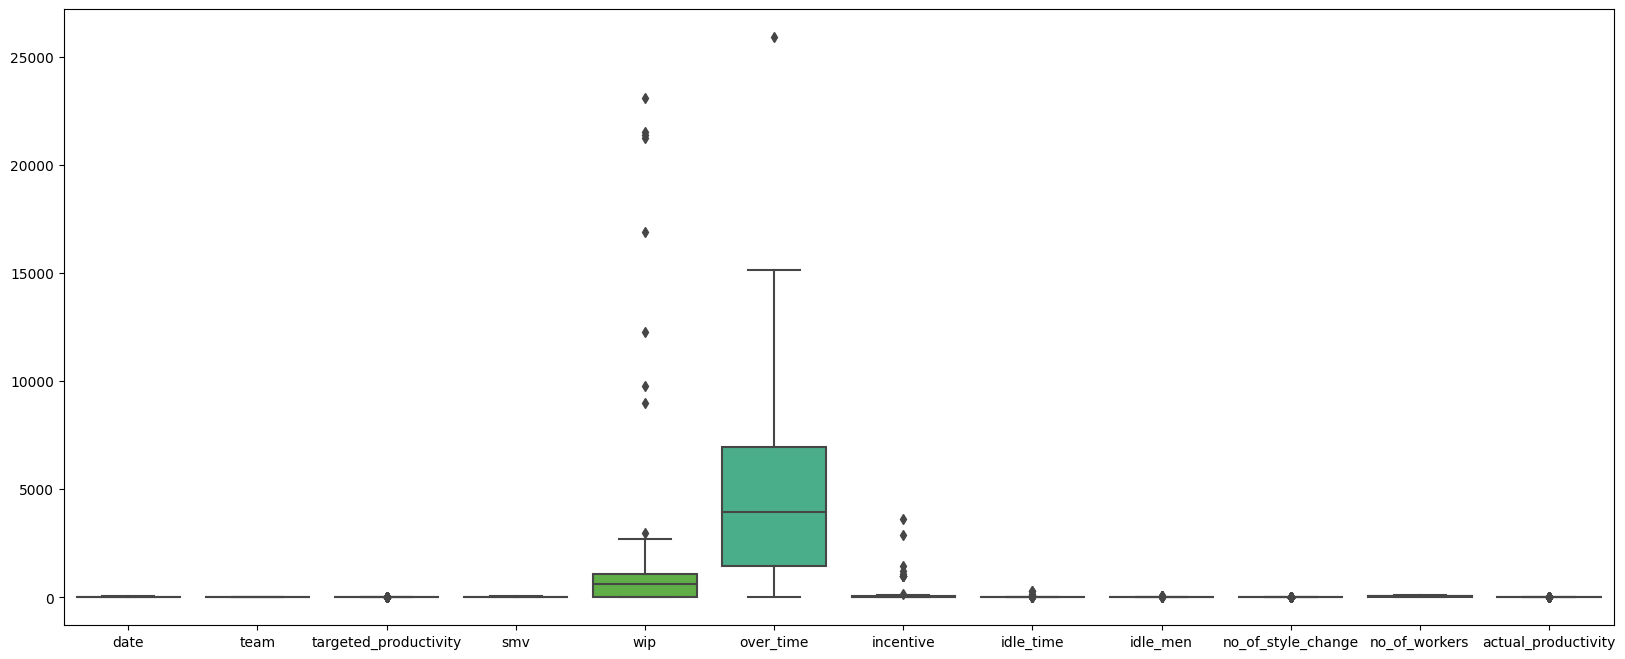

In [242]:
plt.figure(figsize=(20,8))
sns.boxplot(data=dataset)

Overtime and have outliers but not significant

## Encode Categorical Data

In [245]:
dataset = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day'])

### Heatmap

<Axes: >

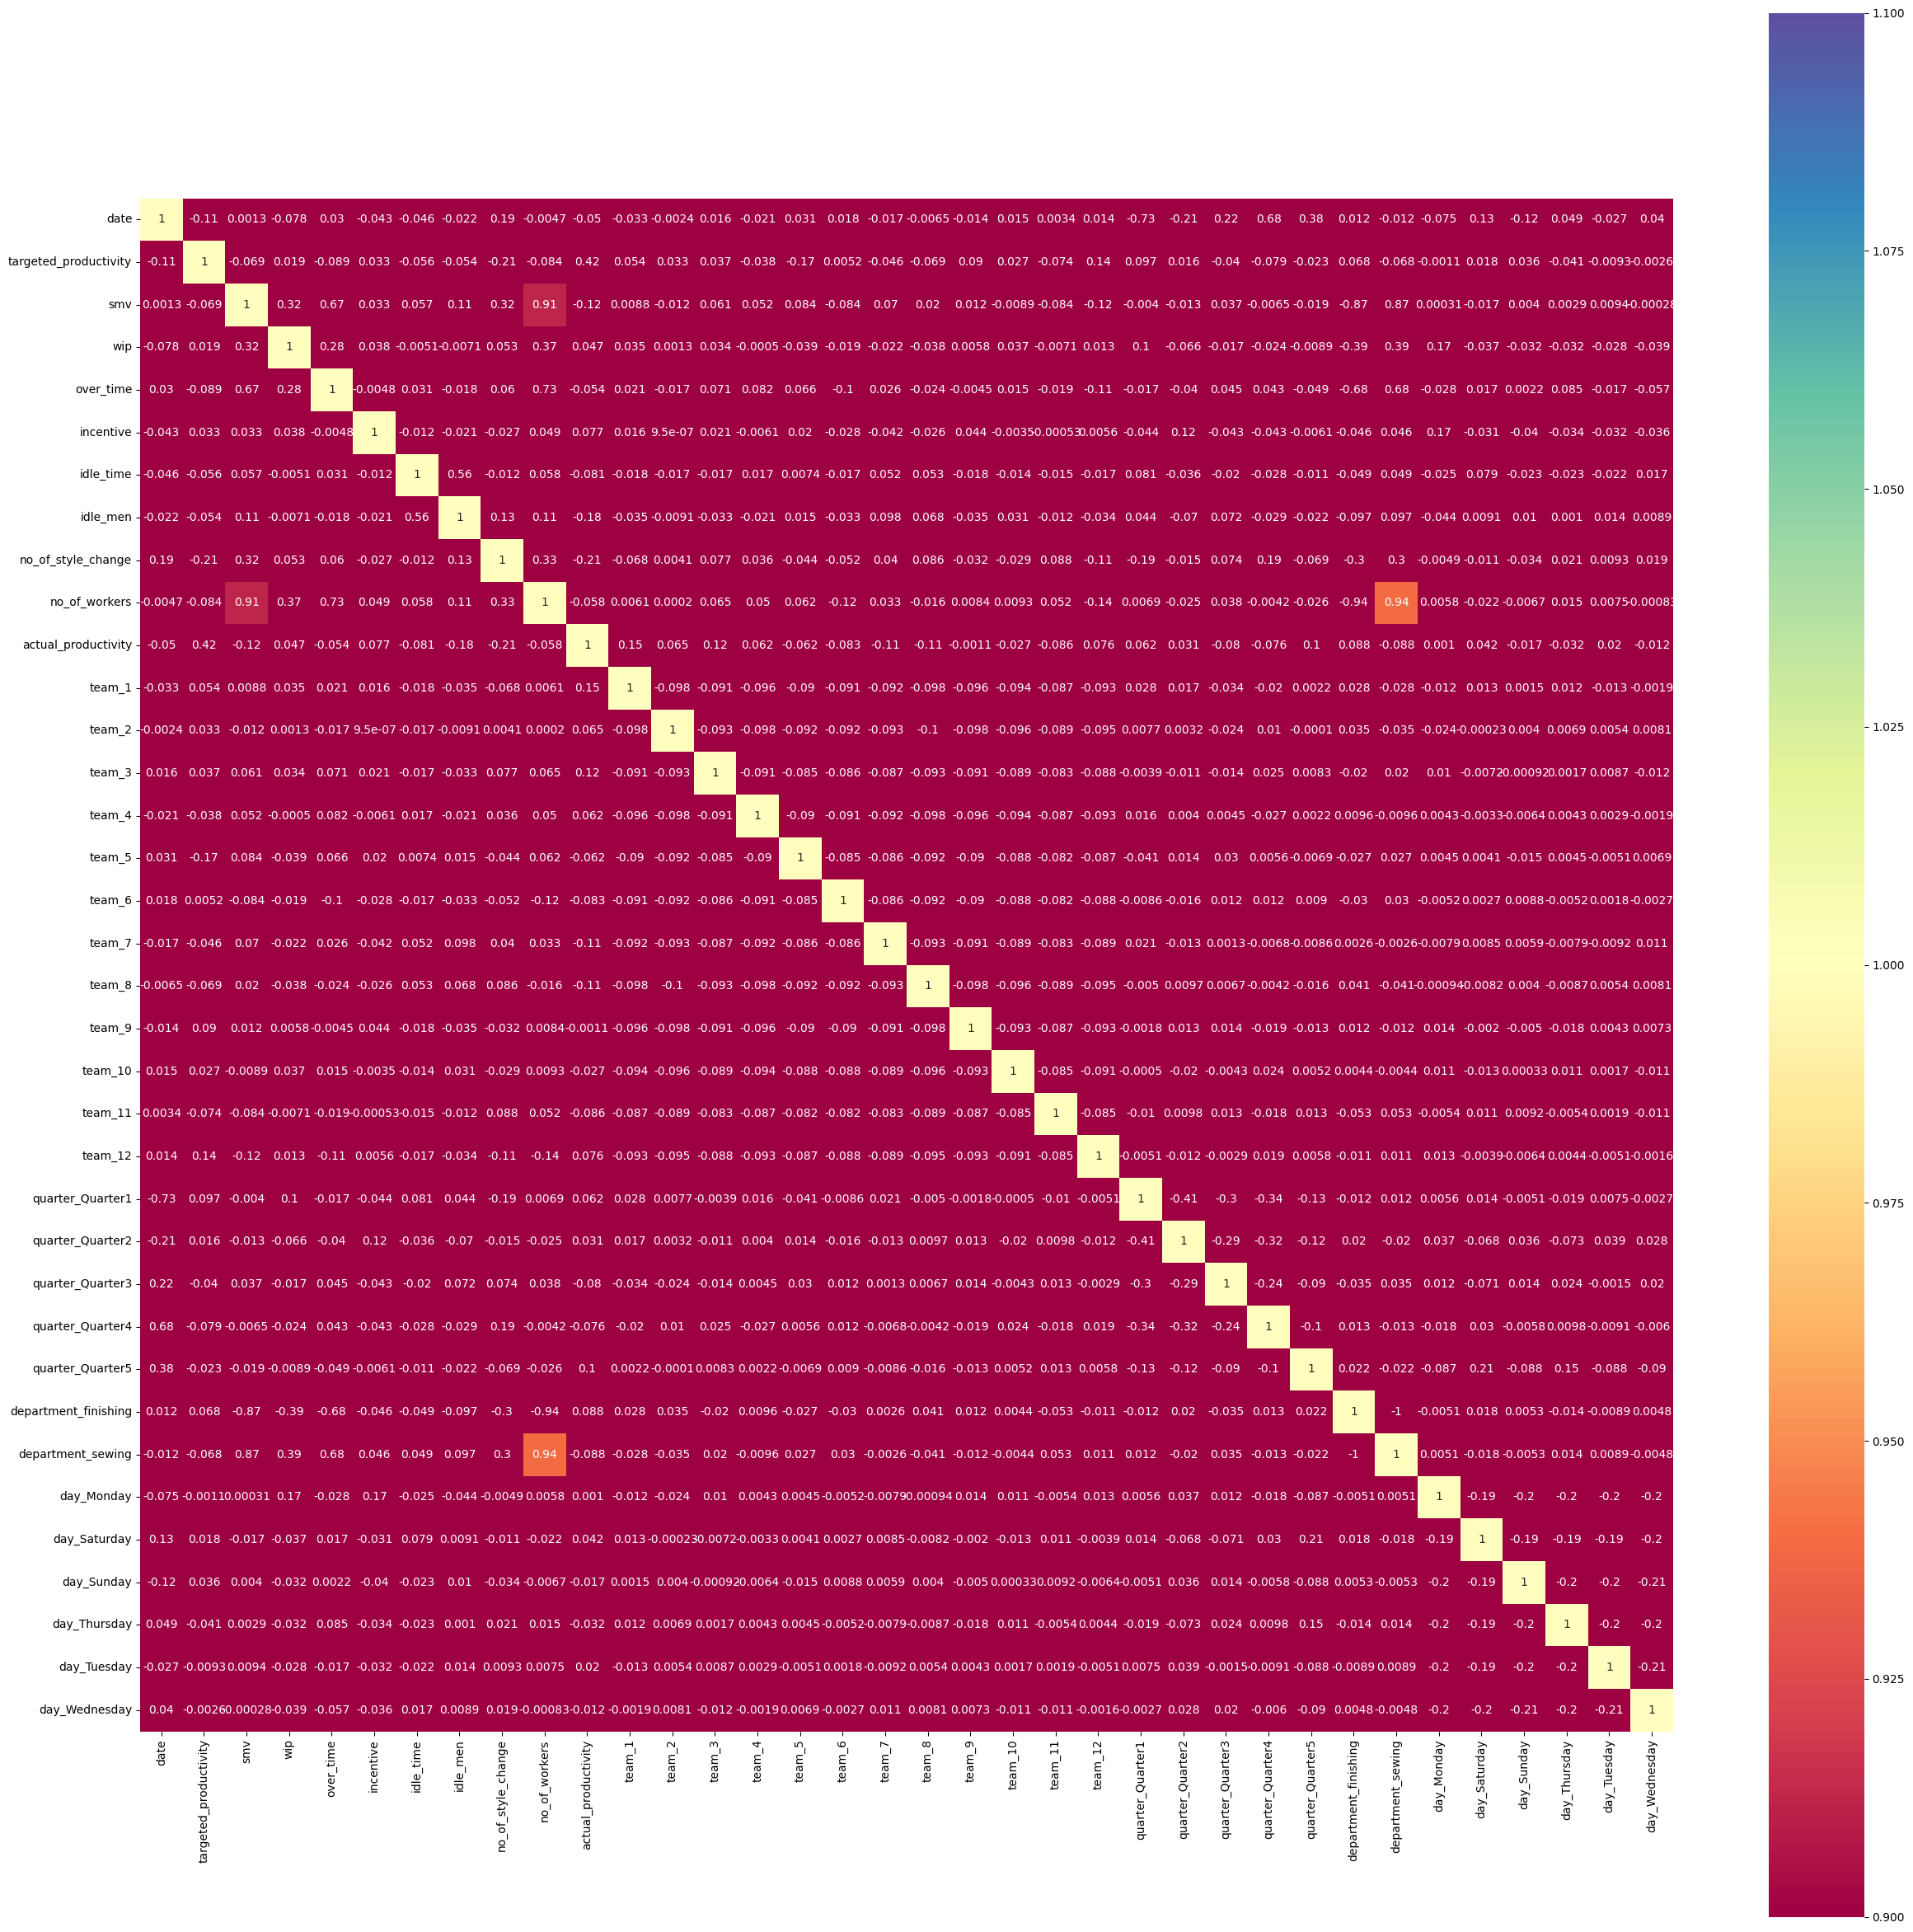

In [250]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(), annot=True, vmin=1, vmax=1, cmap='Spectral',square=True)

## Create Feature (GoalMet)

KeyboardInterrupt: 

<Figure size 2000x800 with 0 Axes>

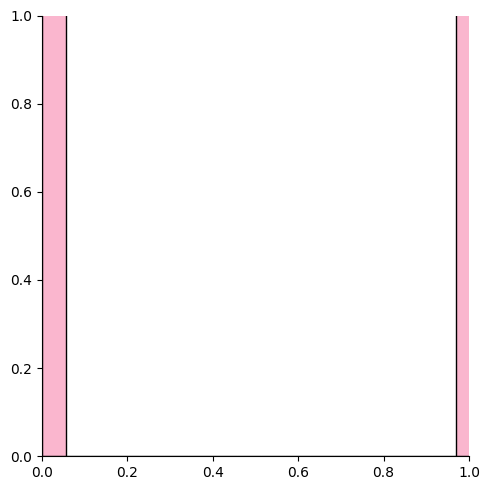

In [251]:
dataset['GoalMet'] = dataset[actual_productivity] -dataset['targeted_productivity'] 

In [252]:
dataset['team'].unique()

KeyError: 'team'

### Targeted Productivity


data = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day'])

In [213]:
oenc=OneHotEncoder()
multiple_categories=oenc.fit_transform(dataset[['quarter','department','day']])
multiple_categories=multiple_categories.toarray()
multiple_categories=pd.DataFrame(multiple_categories,columns=oenc.get_feature_names())


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

## Check Pairwise Relationships

# Features

## Discrete

## Continuous

## Categorical

# Feature Selection